In [2]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 5_000
step_range = [0,0]

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=5000, top_throttle=0, bottom_throttle=0, pitch_angle=None, roll_angle=None), TestStep(duration_ms=5000, top_throttle=0, bottom_throttle=0, pitch_angle=None, roll_angle=None)])

In [4]:
test_directory = Path("../test_data/load_cell_calibration_data_sp/")

In [36]:
data_dict = {}
# data_dict["test_load_cell_offset_sp"] = test_run(
#     filename=test_directory / "test_load_cell_offset_sp.csv", plan=plan
# )

# data_dict["test_load_cell_offset_sp_1"] = test_run(
#     filename=test_directory / "test_load_cell_offset_sp_1.csv", plan=plan
# )

data_dict["test_load_cell_430g_0"] = test_run(
    filename=test_directory / "test_load_cell_430g_0.csv", plan=plan
)

data_dict["test_load_cell_430g_1"] = test_run(
    filename=test_directory / "test_load_cell_430g_1.csv", plan=plan
)

data_dict["test_load_cell_430g_2"] = test_run(
    filename=test_directory / "test_load_cell_430g_2.csv", plan=plan
)

data_dict["test_load_cell_430g_3"] = test_run(
    filename=test_directory / "test_load_cell_430g_3.csv", plan=plan
)

data_dict["test_load_cell_1kg_0"] = test_run(
    filename=test_directory / "test_load_cell_1kg_0.csv", plan=plan
)

data_dict["test_load_cell_1kg_1"] = test_run(
    filename=test_directory / "test_load_cell_1kg_1.csv", plan=plan
)

data_dict["test_load_cell_1kg_2"] = test_run(
    filename=test_directory / "test_load_cell_1kg_2.csv", plan=plan
)

data_dict["test_load_cell_1kg_3"] = test_run(
    filename=test_directory / "test_load_cell_1kg_3.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_0"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_0.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_1"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_1.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_2"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_2.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_3"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_3.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


In [37]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])

In [38]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
    .sort_values(by=('thrust_N', 'mean'))
)

df_steps

top_motor_rpm      bottom_motor_rpm       \
                                          mean  std             mean  std   
test_name               throttle                                            
test_load_cell_430g_0   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_3   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_1   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_2   0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_1    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_2    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_0    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_3    0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_3 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_1 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_0 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_2 0                  0.0  0.0              0.0  0.0   

                                 batt_voltage_V           batt_current_A       \
                                           mean       std           mean  std   
test_name               throttle                                                
test_load_cell_430g_0   0             13.962850  0.023918          10.24  0.0   
test_load_cell_430g_3   0             13.970746  0.022277          10.24  0.0   
test_load_cell_430g_1   0             13.961640  0.025164          10.24  0.0   
test_load_cell_430g_2   0             13.969704  0.022630          10.24  0.0   
test_load_cell_1kg_1    0             13.969133  0.023096          10.24  0.0   
test_load_cell_1kg_2    0             13.965941  0.022444          10.24  0.0   
test_load_cell_1kg_0    0             13.965000  0.024365          10.24  0.0   
test_load_cell_1kg_3    0             13.970040  0.023267          10.24  0.0   
test_load_cell_2.03kg_3 0             13.966613  0.023028          10.24  0.0   
test_load_cell_2.03kg_1 0             13.965101  0.023007          10.24  0.0   
test_load_cell_2.03kg_0 0             13.965235  0.023018          10.24  0.0   
test_load_cell_2.03kg_2 0             13.970477  0.022377          10.24  0.0   

                                 top_current_A           bottom_current_A  \
                                          mean       std             mean   
test_name               throttle                                            
test_load_cell_430g_0   0             0.071979  0.056161        -0.142216   
test_load_cell_430g_3   0             0.064371  0.055290        -0.145955   
test_load_cell_430g_1   0             0.068280  0.054180        -0.145576   
test_load_cell_430g_2   0             0.071746  0.053646        -0.144486   
test_load_cell_1kg_1    0             0.071676  0.053994        -0.105738   
test_load_cell_1kg_2    0             0.072025  0.054240        -0.106829   
test_load_cell_1kg_0    0             0.072072  0.054303        -0.108609   
test_load_cell_1kg_3    0             0.068489  0.059543        -0.113127   
test_load_cell_2.03kg_3 0             0.072374  0.055366        -0.108854   
test_load_cell_2.03kg_1 0             0.072909  0.057530        -0.099818   
test_load_cell_2.03kg_0 0             0.071632  0.054734        -0.100325   
test_load_cell_2.03kg_2 0             0.063906  0.053561        -0.110857   

                                             thrust_N            torque_N  \
                                       std       mean       std      mean   
test_name               throttle                                            
test_load_cell_430g_0   0         0.056669   2.756023  0.002451  1.136781   
test_load_cell_430g_3   0         0.056101   3.568389  0.002616  1.132887   
test_load_cell_430g_1   0         0.054467   3.914095  0.002695  1.159096   
test_load_cell_430g_2   0         0.054770 

In [47]:
# hx711_scale_factor = 21400
# load_cell_offset_N = df_steps.loc['test_load_cell_offset_recal']['thrust_N']['mean'][0]
# load_cell_offset_bin = int(load_cell_offset_N * hx711_scale_factor)

# Remove offset test from df and subtract offset from existing measurements
# df_steps_nonzero = df_steps.drop('test_load_cell_offset_recal')
thrust_calibration_series = df_steps['thrust_N']['mean'] / 9.81
thrust_calibration_series

test_name                throttle
test_load_cell_430g_0    0           0.280940
test_load_cell_430g_3    0           0.363750
test_load_cell_430g_1    0           0.398990
test_load_cell_430g_2    0           0.503941
test_load_cell_1kg_1     0           0.826219
test_load_cell_1kg_2     0           0.831438
test_load_cell_1kg_0     0           0.856617
test_load_cell_1kg_3     0           0.956813
test_load_cell_2.03kg_3  0           1.763660
test_load_cell_2.03kg_1  0           1.764355
test_load_cell_2.03kg_0  0           1.849573
test_load_cell_2.03kg_2  0           1.864846
Name: mean, dtype: float64

In [48]:
mass_true_kg = np.array([0.43, 0.43, 0.43, 0.43, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0])

In [49]:
def calibrated_thrust(measured_thrust, gain, offset):
    return gain * measured_thrust + offset

In [50]:
from scipy.optimize import curve_fit

In [59]:
thrust_fit_popt,thrust_fit_pcov = curve_fit(calibrated_thrust, thrust_calibration_series, mass_true_kg, sigma=df_steps['thrust_N']['std'] / 9.81, absolute_sigma=True)
thrust_cal_fcn = np.vectorize(lambda T: calibrated_thrust(T, thrust_fit_popt[0], thrust_fit_popt[1]))
thrust_line_pts = [0, 2.03]

print(thrust_fit_popt)

[1.08549252 0.05664073]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


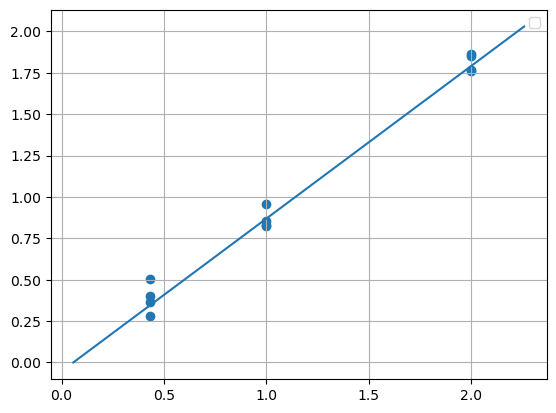

In [58]:
plt.scatter(mass_true_kg, thrust_calibration_series)
plt.plot(thrust_cal_fcn(thrust_line_pts), thrust_line_pts)
plt.legend()
plt.grid()